# Introduction

- **What is clustering?**

Clustering is a type of unsupervised learning which is used to split unlabeled data into different groups. Clustering is generally used in Data Analysis to get to know about the different groups that may exist in our dataset.





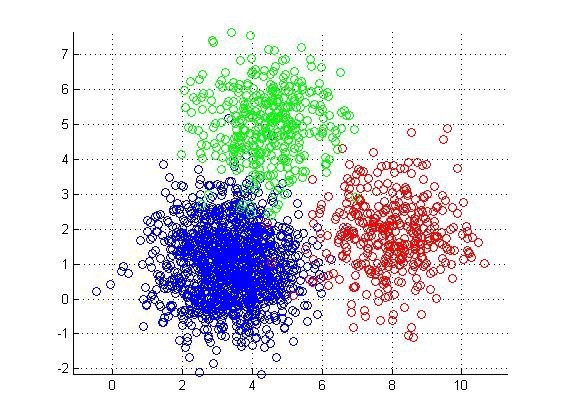

## Creating a testing dataset

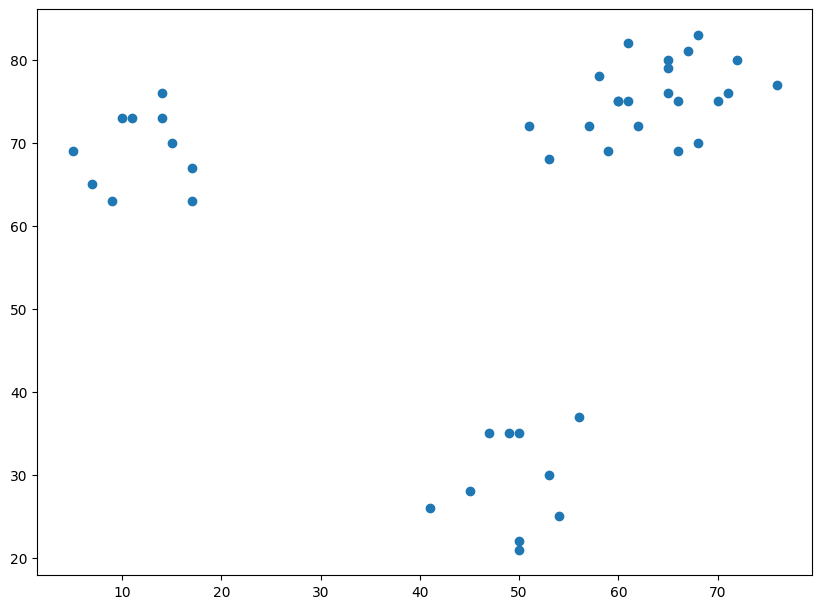

In [ ]:
import random
def data_generator():
    X = []
    Y = []
    no_of_clusters = random.randint(3,5)
    for i in range(no_of_clusters):
        cluster_X = random.randint(8,92)
        cluster_Y = random.randint(8,92)
        for j in range(random.randint(10,15)):
            X.append(cluster_X + random.randint(-8,8))
            Y.append(cluster_Y + random.randint(-8,8))
    data = list(zip(X, Y))
    return data

data = data_generator()

import matplotlib.pyplot as plt
x,y = zip(*data)
plt.scatter(x,y)
plt.show()

In [ ]:
data

[(49, 35),
 (56, 37),
 (50, 22),
 (47, 35),
 (45, 28),
 (53, 30),
 (50, 35),
 (50, 21),
 (54, 25),
 (41, 26),
 (66, 75),
 (76, 77),
 (65, 76),
 (61, 82),
 (72, 80),
 (70, 75),
 (68, 70),
 (66, 69),
 (71, 76),
 (61, 75),
 (68, 83),
 (65, 79),
 (57, 72),
 (51, 72),
 (60, 75),
 (60, 75),
 (65, 80),
 (53, 68),
 (62, 72),
 (59, 69),
 (58, 78),
 (67, 81),
 (17, 67),
 (11, 73),
 (17, 63),
 (7, 65),
 (5, 69),
 (14, 76),
 (9, 63),
 (14, 73),
 (15, 70),
 (10, 73)]

In [ ]:
len(data)

42

## How to measure distance?

Euclidean distance is the most common metric. The formula for Euclidean distance for 2 dimensions is given by:

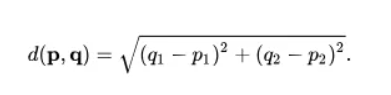

In [ ]:
#Calculate distance between 2 points for 2-Dimensions
def calc_dist_2D(point1, point2):
    distsq = 0
    for i in range(2):
        distsq += (point1[i] - point2[i]) ** 2
    dist = distsq ** (1/2)
    return dist


#Calculate distance between 2 points for n-Dimensions
def calc_dist(ndim_point1, ndim_point2):
    ndim = len(ndim_point1)
    distsq = 0
    for i,j in zip(ndim_point1, ndim_point2):
        distsq += (i-j) ** 2
    dist = distsq ** (1/2)
    return dist

### Clustering with 3 features (3D)

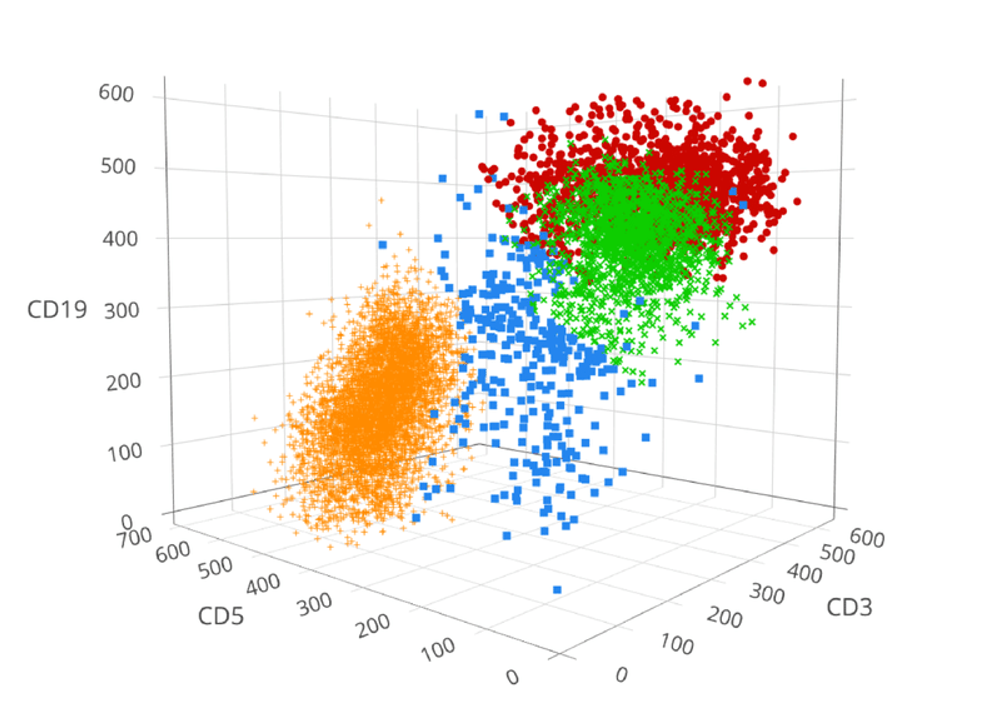

# Steps for the Algorithm

## Step 1: Initializing K random centroids 

In [ ]:
k = int(input("Enter the number of clusters: "))

Enter the number of clusters: 3


In [ ]:
centroids = random.sample(data, k)
centroids

[(14, 73), (47, 35), (76, 77)]

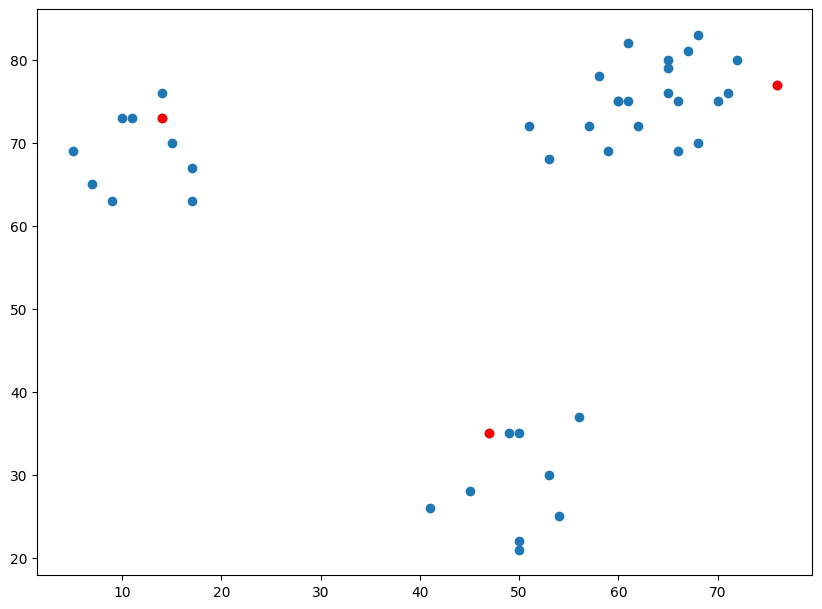

In [ ]:
x,y = zip(*data)
plt.scatter(x,y)
centroid_x, centroid_y = zip(*centroids)
plt.scatter(centroid_x, centroid_y, c= "red")
plt.show()

## Step 2: Getting the minimum distance from each point to the centroids

In [ ]:
def calc_dist_from_centroids(data, centroids):
    dist_from_centroids = []
    for data_x, data_y in data:
        centroid_data_dist = []
        for x,y in centroids:
            d = calc_dist_2D((data_x, data_y), (x, y))
            centroid_data_dist.append(d)
        dist_from_centroids.append(centroid_data_dist)
    return dist_from_centroids

In [ ]:
dist_from_centroids = calc_dist_from_centroids(data, centroids)
print(dist_from_centroids)

[[51.66236541235796, 2.0, 49.92995093127971], [55.31726674375732, 9.219544457292887, 44.721359549995796], [62.42595614005443, 13.341664064126334, 60.83584469702052], [50.32891812864648, 0.0, 51.03920062069938], [54.644304369257, 7.280109889280518, 57.982756057296896], [58.05170109479997, 7.810249675906654, 52.32590180780452], [52.3450093132096, 3.0, 49.39635614091387], [63.245553203367585, 14.317821063276353, 61.741396161732524], [62.48199740725323, 12.206555615733702, 56.462376853972415], [54.20332093147061, 10.816653826391969, 61.85466837676846], [52.03844732503075, 44.28317965096906, 10.198039027185569], [62.12889826803627, 51.03920062069938, 0.0], [51.088159097779204, 44.77722635447622, 11.045361017187261], [47.853944456021594, 49.040799340956916, 15.811388300841896], [58.42088667591412, 51.478150704935004, 5.0], [56.0357029044876, 46.14108798023731, 6.324555320336759], [54.08326913195984, 40.8166632639171, 10.63014581273465], [52.15361924162119, 38.948684188300895, 12.806248474865

## Step 3:Assigning each point to a centroid based on minimum distance

In [ ]:
def find_closest_centroid(dist_from_centroids):
    min_dist_among_centroids = [min(i) for i in dist_from_centroids]
    closest_centroid = [dist_from_centroids[i].index(min_dist_among_centroids[i]) + 1 for i in range(len(data))]
    return closest_centroid, min_dist_among_centroids

In [ ]:
closest_centroid, min_dist_among_centroids = find_closest_centroid(dist_from_centroids)
print(closest_centroid)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
print(min_dist_among_centroids)

[2.0, 9.219544457292887, 13.341664064126334, 0.0, 7.280109889280518, 7.810249675906654, 3.0, 14.317821063276353, 12.206555615733702, 10.816653826391969, 10.198039027185569, 0.0, 11.045361017187261, 15.811388300841896, 5.0, 6.324555320336759, 10.63014581273465, 12.806248474865697, 5.0990195135927845, 15.132745950421556, 10.0, 11.180339887498949, 19.6468827043885, 25.495097567963924, 16.1245154965971, 16.1245154965971, 11.40175425099138, 24.698178070456937, 14.866068747318506, 18.788294228055936, 18.027756377319946, 9.848857801796104, 6.708203932499369, 3.0, 10.44030650891055, 10.63014581273465, 9.848857801796104, 3.0, 11.180339887498949, 0.0, 3.1622776601683795, 4.0]


In [ ]:
def make_clusters(data, closest_centroid):
    clusters = []
    for i in range(max(closest_centroid)):
        cluster_i = []
        clusters.append(cluster_i)
    for i in range(len(data)):
        clusters[closest_centroid[i] - 1].append(data[i])
    return clusters

In [ ]:
clusters = make_clusters(data, closest_centroid)
print(clusters)

[[(17, 67), (11, 73), (17, 63), (7, 65), (5, 69), (14, 76), (9, 63), (14, 73), (15, 70), (10, 73)], [(49, 35), (56, 37), (50, 22), (47, 35), (45, 28), (53, 30), (50, 35), (50, 21), (54, 25), (41, 26)], [(66, 75), (76, 77), (65, 76), (61, 82), (72, 80), (70, 75), (68, 70), (66, 69), (71, 76), (61, 75), (68, 83), (65, 79), (57, 72), (51, 72), (60, 75), (60, 75), (65, 80), (53, 68), (62, 72), (59, 69), (58, 78), (67, 81)]]


In [ ]:
def visualize(clusters, centroids):
    for cluster in clusters:
        x_coords, y_coords = zip(*cluster)
        plt.scatter(x_coords, y_coords)

    x_centroids, y_centroids = zip(*centroids)
    plt.scatter(x_centroids, y_centroids,s=200,c='yellow')
    plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
    plt.show()

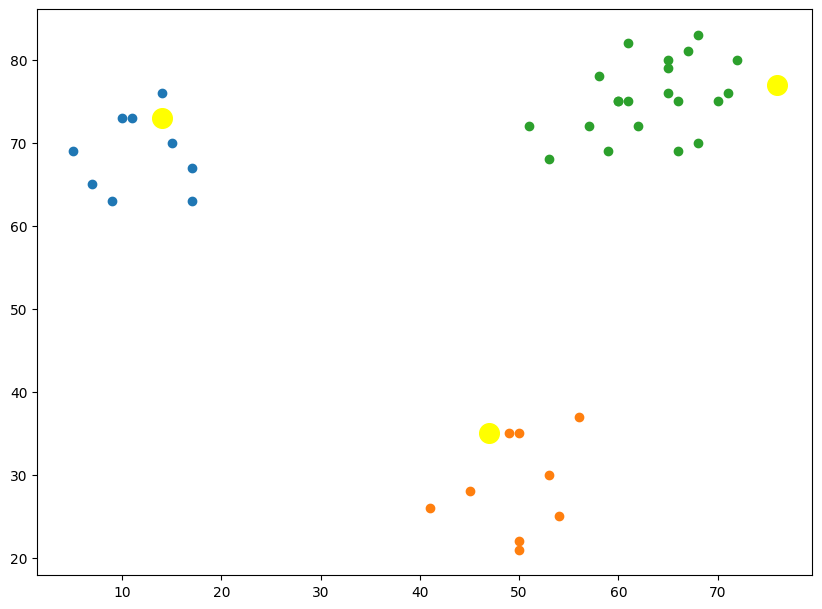

In [ ]:
visualize(clusters, centroids)

## Step 4: Updating the Centroids

In [ ]:
def mean(cluster):
    # print(cluster)
    x, y = list(zip(*cluster))
    x_mean = sum(x)/len(x)
    y_mean = sum(y)/len(y)
    return (x_mean, y_mean)

def cal_new_centroids(clusters):
    new_centroids = []
    for cluster in clusters:
        new_centroids.append(mean(cluster))
    return new_centroids

In [ ]:
new_centroids = cal_new_centroids(clusters)
print(new_centroids)

[(11.9, 69.2), (49.5, 29.4), (63.68181818181818, 75.4090909090909)]


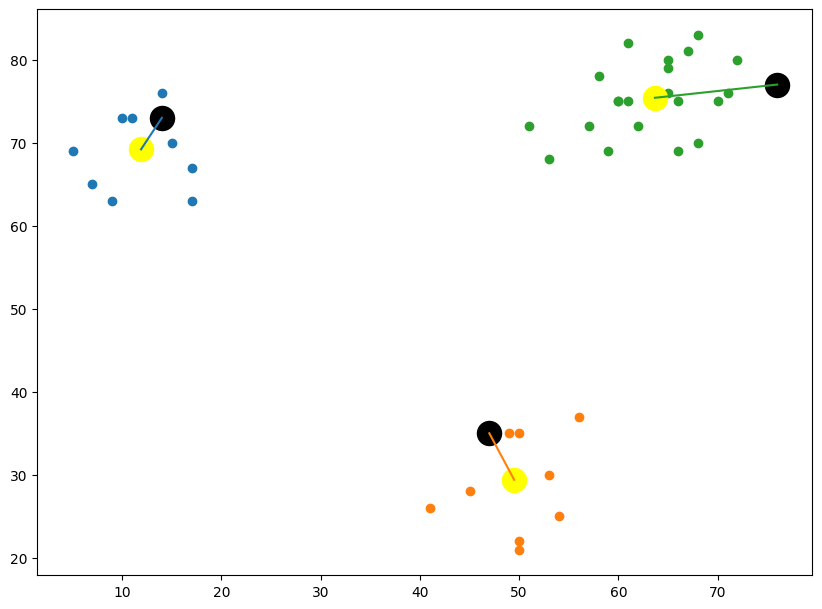

In [ ]:
#Observing the shift in Centroids 
x_cent, y_cent = zip(*centroids)
x_cent_new, y_cent_new = zip(*new_centroids)
for cluster in clusters:
    cluster_x, cluster_y = zip(*cluster)
    plt.scatter(cluster_x, cluster_y)

plt.scatter(x_cent, y_cent, s=300,c='black')
plt.scatter(x_cent_new, y_cent_new, s=300,c='yellow')
plt.plot([x_cent, x_cent_new],[y_cent, y_cent_new])

plt.show()

## Step 5: Repeat steps 2-4 until the centroid keeps changing or till 'limit' no. of Iterations  

## Iterating over the process

In [ ]:
def k_means(data, k, limit, graph_after_iterations=[]):
    start = 0

    while (start < limit):
        if start == 0:
            centroids = random.sample(data, k)
        else:
            centroids = new_centroids

        dist_from_centroids = calc_dist_from_centroids(data, centroids)
        closest_centroid, data_centroid_dist = find_closest_centroid(dist_from_centroids)
        clusters = make_clusters(data, closest_centroid)
        new_centroids = cal_new_centroids(clusters)

        if (new_centroids == centroids):
            break
        if start in graph_after_iterations:
            visualize(clusters, new_centroids)

        start += 1

    return clusters, new_centroids, data_centroid_dist


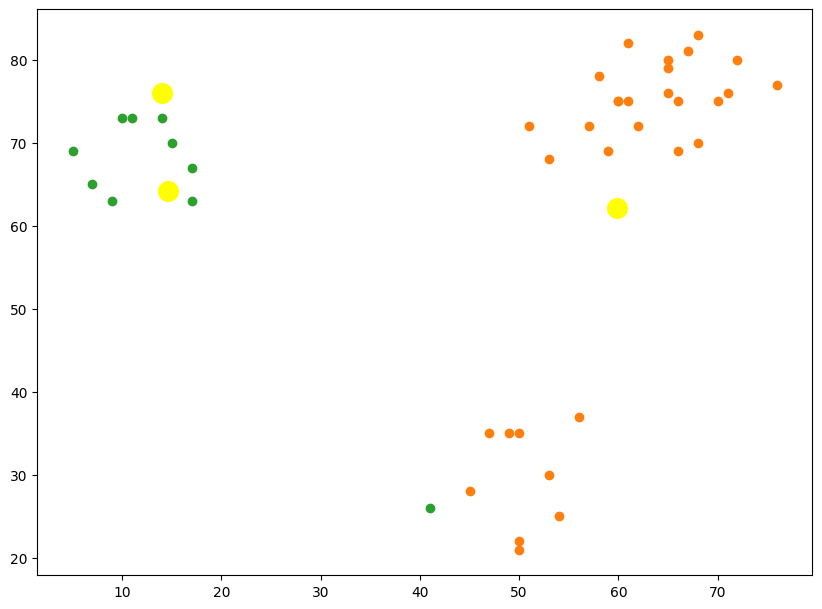

In [ ]:
clusters, centroids, data_centroid_dist = k_means(data, k, 50, [0,49])

## Kmeans++ Steps:

1. Randomly select the first centroid from the data points.
2. For each data point compute its distance from the nearest, previously chosen centroid.
3. Select the next centroid from the data points such that the probability of choosing a point as centroid is directly proportional to its distance from the nearest, previously chosen centroid. (i.e. the point having maximum distance from the nearest centroid is most likely to be selected next as a centroid)
4. Repeat steps 2 and 3 until k centroids have been sampled

**TLDR: we pick up centroids that are far away from one another.**


This increases the chances of initially picking up centroids that lie in different clusters.

In [ ]:
def choose_centroids(data, k):
    centroids = []
    centroid1 = random.choice(data)
    centroids.append(centroid1)
    for i in range(k-1):
        prev_centroid = centroids[-1]
        prev_centroid_data_dist = (calc_dist_from_centroids(data, [prev_centroid]))
        prev_centroid_data_dist = list(map(lambda x: x[0], prev_centroid_data_dist))
        #biased probabilty according to the dist from centroid
        sum_of_dist = sum(prev_centroid_data_dist)
        cumulative_addn_of_dist = [sum(prev_centroid_data_dist[:i+1]) for i in range(len(prev_centroid_data_dist))]
        random_no = random.randint(0, int(sum_of_dist))

        if random_no <= cumulative_addn_of_dist[0]:
            next_centroid = data[0]
        elif cumulative_addn_of_dist[-2] < random_no <= cumulative_addn_of_dist[-1]:
            next_centroid = data[-1]
        else:
            for p in range(1, len(cumulative_addn_of_dist)-1):
                if cumulative_addn_of_dist[p-1] < random_no <= cumulative_addn_of_dist[p+1]:
                    next_centroid = data[p+1]
                    break
        
        centroids.append(next_centroid)
    return centroids    


In [ ]:
centroids = choose_centroids(data, k)
print(centroids)

[(58, 78), (14, 73), (65, 79)]


In [ ]:
def k_means2(data, k, limit, graph_after_iterations=[]):
    start = 0

    while (start < limit):
        if start == 0:
            centroids = choose_centroids(data, k)
        else:
            centroids = new_centroids

        dist_from_centroids = calc_dist_from_centroids(data, centroids)
        closest_centroid, data_centroid_dist = find_closest_centroid(dist_from_centroids)
        clusters = make_clusters(data, closest_centroid)
        new_centroids = cal_new_centroids(clusters)

        if (new_centroids == centroids):
            break
        if start in graph_after_iterations:
            visualize(clusters, new_centroids)

        start += 1

    return clusters, new_centroids, data_centroid_dist


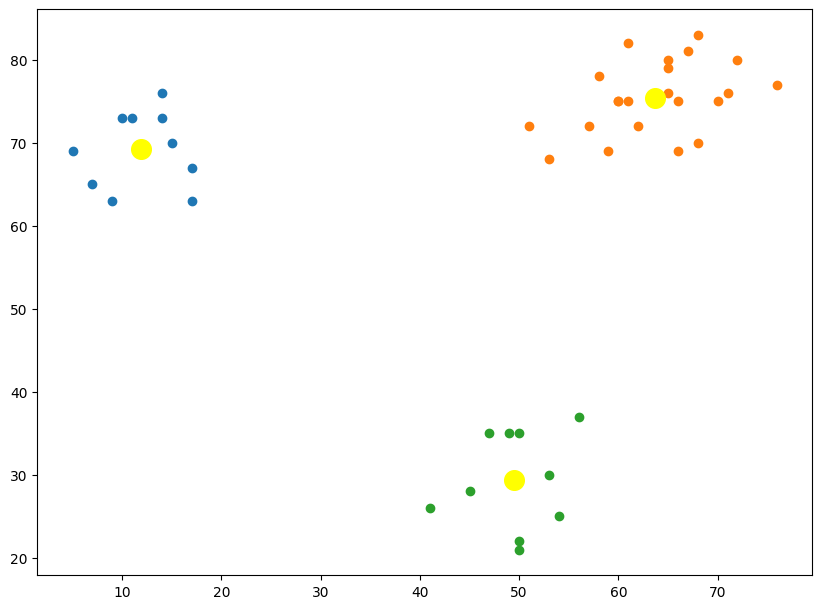

In [ ]:
clusters, centroids, data_centroid_dist = k_means2(data, k, 50, [0,49])


Now that we know what the optimal value of K is we can finalise it. 
- k-means++ ensures that you get don’t fall into the random initialization trap.

##Elbow method to determine the optimal value of K

Sum of squares of distances of every data point from its corresponding cluster centroid which is called WCSS ( Within-Cluster Sums of Squares).

1. Perform K means clustering on different values of K ranging from 1 to any upper limit. Here we are taking the upper limit as 10.
2. For each K, calculate WCSS
3. Plot the value for WCSS with the number of clusters K.
4. The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters. i.e the point after which WCSS doesn’t decrease more rapidly is the appropriate value of K.

In [ ]:
def wcss(data_centroid_dist):
    dist_from_centroid_sq = [i**2 for i in data_centroid_dist]
    wcss_value = sum(dist_from_centroid_sq)
    return wcss_value


In [ ]:
def elbow_method(data):
    wcss_values = []
    for k in range(1, 11):
        clusters, centroids, data_centroid_dist = k_means2(data, k, limit=50, graph_after_iterations=[])
        wcss_value = wcss(data_centroid_dist)
        wcss_values.append(wcss_value)
    return wcss_values


In [ ]:
wcss_values = elbow_method(data)


In [ ]:
def plot_wcss_graph(wcss_values):
    plt.plot([i for i in range(1,11)], wcss_values)
    plt.show()

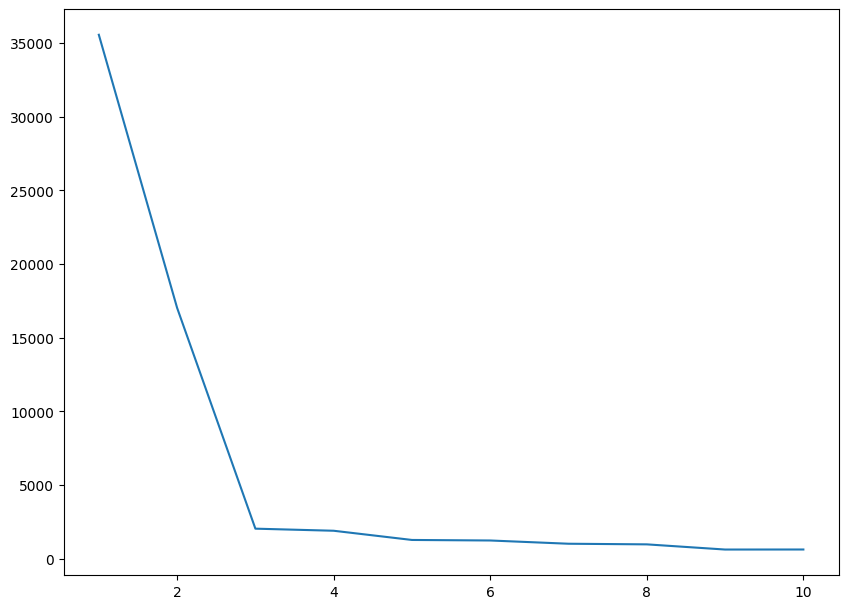

In [ ]:
plot_wcss_graph(wcss_values)

In [ ]:
k = int(input("Enter the elbow point which is best value for k: "))


Enter the elbow point which is best value for k: 3


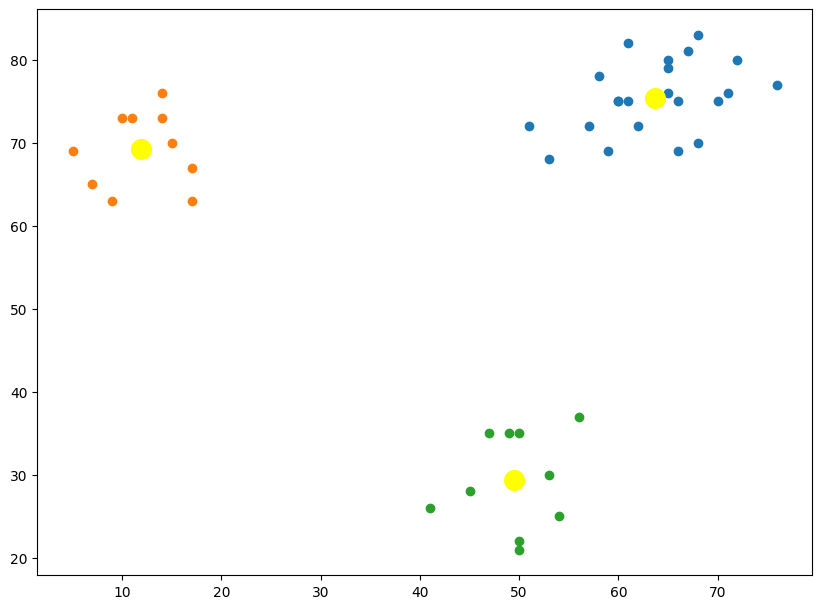

In [ ]:
clusters, centroids, data_centroid_dist = k_means2(data, k, 50, [0,49])


One disadvantage of the K-means algorithm is that it is sensitive to the initialization of the centroids or the mean points.





## Real world Case

Download the dataset: [Link to dataset](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

In [ ]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from sklearn.cluster import KMeans

In [ ]:
mall_df = pd.read_csv("/Mall_Customers.csv")
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
X_mall = mall_df[[ 'Annual Income (k$)', 'Spending Score (1-100)']].to_numpy()
X_mall

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

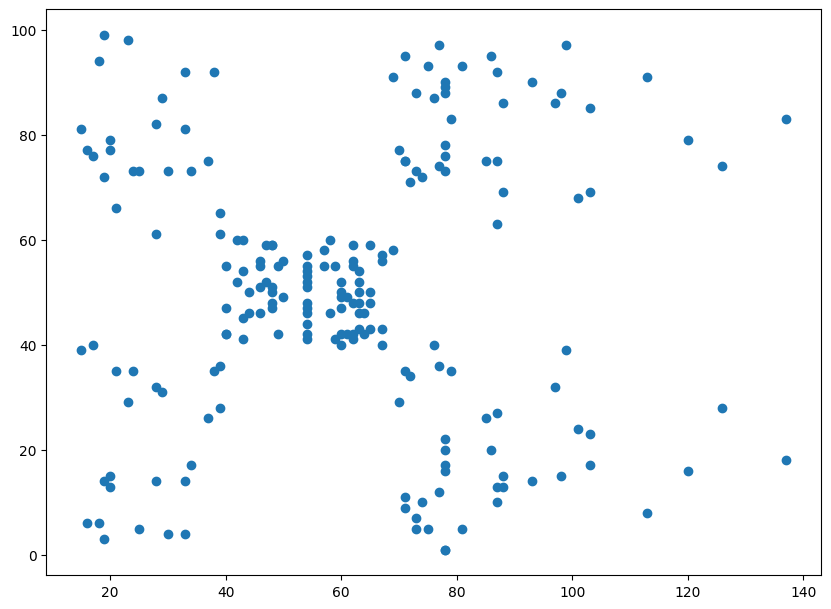

In [ ]:
plt.scatter(X_mall[:, 0], X_mall[:, 1]);

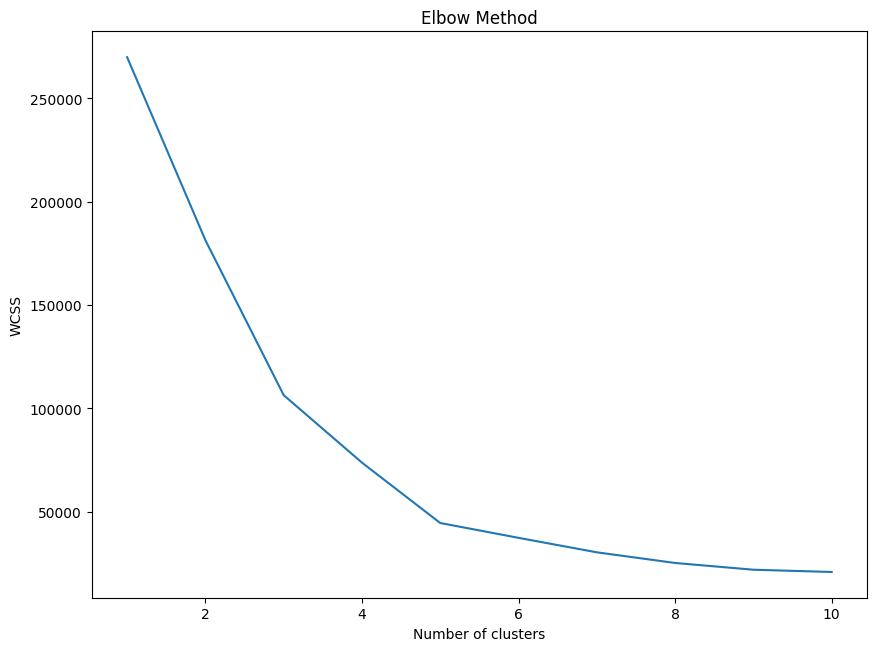

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_mall)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

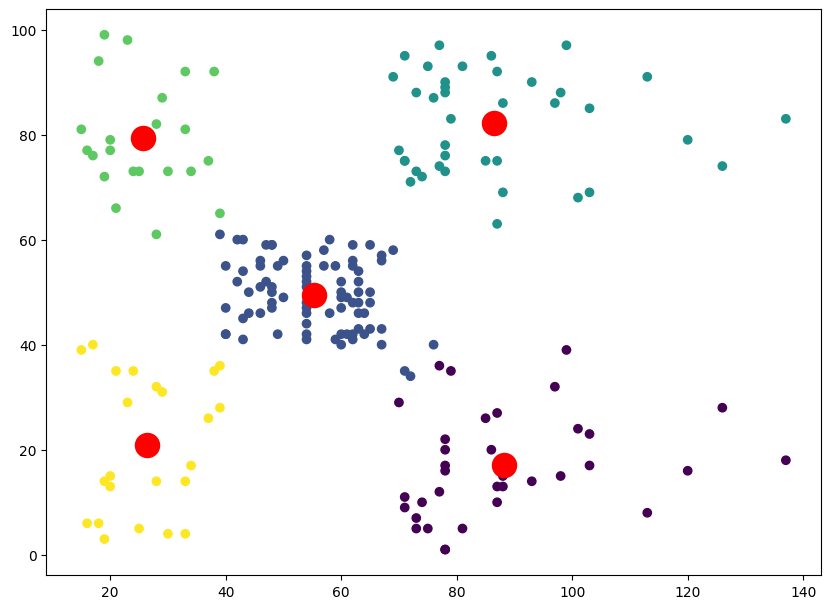

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_mall)
plt.scatter(X_mall[:,0], X_mall[:,1], c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

THANK YOU AND ALL THE BEST!

# References 

- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

- https://scikit-learn.org/stable/modules/clustering.html

- https://towardsdatascience.com/k-means-clustering-from-scratch-6a9d19cafc25

- https://medium.com/machine-learning-algorithms-from-scratch/k-means-clustering-from-scratch-in-python-1675d38eee42
